In [1]:
import numpy as np
import xgboost as xgb
from wideboost.wrappers import wxgb

import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

for i in ds_train.batch(60000):
    a = i
    
for i in ds_test.batch(60000):
    b = i

In [2]:
xtrain = a[0].numpy().reshape([-1,28*28])
ytrain = a[1].numpy()

xtest = b[0].numpy().reshape([-1,28*28])
ytest = b[1].numpy()

dtrain = xgb.DMatrix(xtrain,label=ytrain)
dtest = xgb.DMatrix(xtest,label=ytest)

In [7]:
param = {'max_depth':2, 'eta':0.1, 'objective':'multi:softmax','eval_metric':['merror'], 'num_class':10 }
num_round = 100
watchlist = [(dtrain,'train'),(dtest,'test')]
xgb_results = dict()
bst = xgb.train(param, dtrain, num_round,watchlist,evals_result=xgb_results)

[0]	train-merror:0.40557	test-merror:0.40420
[1]	train-merror:0.32473	test-merror:0.32330
[2]	train-merror:0.29810	test-merror:0.30120
[3]	train-merror:0.27798	test-merror:0.27590
[4]	train-merror:0.26612	test-merror:0.26780
[5]	train-merror:0.25288	test-merror:0.25250
[6]	train-merror:0.24293	test-merror:0.24160
[7]	train-merror:0.23422	test-merror:0.23210
[8]	train-merror:0.22730	test-merror:0.22410
[9]	train-merror:0.22117	test-merror:0.21810
[10]	train-merror:0.21758	test-merror:0.21600
[11]	train-merror:0.21475	test-merror:0.21410
[12]	train-merror:0.21145	test-merror:0.20920
[13]	train-merror:0.20688	test-merror:0.20570
[14]	train-merror:0.20385	test-merror:0.20180
[15]	train-merror:0.20107	test-merror:0.19910
[16]	train-merror:0.19753	test-merror:0.19460
[17]	train-merror:0.19545	test-merror:0.19100
[18]	train-merror:0.19255	test-merror:0.18900
[19]	train-merror:0.18987	test-merror:0.18490
[20]	train-merror:0.18780	test-merror:0.18350
[21]	train-merror:0.18515	test-merror:0.1802

In [8]:
# wideboost uses the hessian for multi:softmax rather than 2 times the hessian as used in xgboost.
# On MNIST at least, the hessian tends to perform better.
param['extra_dims'] = 0
wxgb_results = dict()
wbst = wxgb.train(param, dtrain, num_round,watchlist,evals_result=wxgb_results)

Overwriting param `num_class`
Overwriting param `objective` while setting `obj` in train.
Taking first argument of evals. Multiple evals not supported using xgboost backend.
Moving param `eval_metric` to an feval.
Setting param `disable_default_eval_metric` to 1.
[0]	train-merror:0.40557	test-merror:0.40420
[1]	train-merror:0.32860	test-merror:0.32830
[2]	train-merror:0.28187	test-merror:0.28420
[3]	train-merror:0.25488	test-merror:0.25290
[4]	train-merror:0.23483	test-merror:0.23210
[5]	train-merror:0.22772	test-merror:0.22610
[6]	train-merror:0.21600	test-merror:0.21240
[7]	train-merror:0.20888	test-merror:0.20320
[8]	train-merror:0.20163	test-merror:0.19830
[9]	train-merror:0.19638	test-merror:0.19110
[10]	train-merror:0.18943	test-merror:0.18570
[11]	train-merror:0.18567	test-merror:0.18030
[12]	train-merror:0.18073	test-merror:0.17600
[13]	train-merror:0.17568	test-merror:0.17180
[14]	train-merror:0.17165	test-merror:0.16650
[15]	train-merror:0.16685	test-merror:0.16110
[16]	train

In [9]:
param['extra_dims'] = 32
wxgb32_results = dict()
wbst = wxgb.train(param, dtrain, num_round,watchlist,evals_result=wxgb32_results)

Overwriting param `num_class`
Overwriting param `objective` while setting `obj` in train.
Taking first argument of evals. Multiple evals not supported using xgboost backend.
Moving param `eval_metric` to an feval.
Setting param `disable_default_eval_metric` to 1.
[0]	train-merror:0.26613	test-merror:0.25700
[1]	train-merror:0.18875	test-merror:0.18230
[2]	train-merror:0.15703	test-merror:0.15510
[3]	train-merror:0.14017	test-merror:0.13670
[4]	train-merror:0.12618	test-merror:0.12150
[5]	train-merror:0.11690	test-merror:0.11440
[6]	train-merror:0.10855	test-merror:0.10600
[7]	train-merror:0.10113	test-merror:0.09920
[8]	train-merror:0.09572	test-merror:0.09530
[9]	train-merror:0.09128	test-merror:0.08970
[10]	train-merror:0.08565	test-merror:0.08640
[11]	train-merror:0.08238	test-merror:0.08330
[12]	train-merror:0.07852	test-merror:0.08050
[13]	train-merror:0.07515	test-merror:0.07750
[14]	train-merror:0.07210	test-merror:0.07490
[15]	train-merror:0.06992	test-merror:0.07350
[16]	train

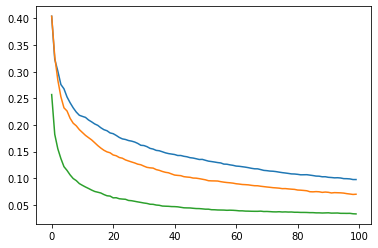

In [11]:
plt.plot(xgb_results['test']['merror'])
plt.plot(wxgb_results['test']['merror'])
plt.plot(wxgb32_results['test']['merror'])
plt.show()